In [64]:
require(forecast)
require(dplyr)
require(tidyr)
require(xlsx)
require(tseries)
require(lubridate)
require(ggplot2)

Loading required package: ggplot2


In [3]:
data <- read.xlsx("tb-sales.xlsx",sheetName="Sheet1")

In [11]:
data$DATE <- ymd(data$DATE)

In [17]:
data_ts <- ts(data,start=c(2009,1),end=c(2016,6),frequency=12)

In [19]:
data_ts[,2]

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2009 7523.622 7551.028 7543.573 7551.169 7562.281 7625.045 7622.773 7648.297
2010 7720.824 7713.475 7716.032 7717.806 7713.795 7710.565 7724.977 7736.266
2011 7852.139 7877.379 7918.133 7955.301 7980.613 7980.613 8001.523 8026.763
2012 8089.030 8107.383 8125.737 8139.653 8119.631 8111.963 8110.863 8159.462
2013 8223.255 8271.677 8247.112 8230.888 8232.272 8248.674 8262.590 8280.340
2014 8357.978 8364.546 8374.344 8395.573 8406.506 8414.068 8422.694 8419.287
2015 8340.867 8357.233 8372.995 8384.994 8409.098 8428.516 8439.557 8438.457
2016 8452.799 8438.599 8446.160 8480.595 8499.055 8517.408                  
          Sep      Oct      Nov      Dec
2009 7663.065 7686.069 7711.807 7715.819
2010 7748.762 7775.743 7795.445 7826.756
2011 8044.194 8049.625 8064.499 8066.417
2012 8200.039 8223.753 8210.369 8210.156
2013 8294.291 8299.864 8314.455 8337.068
2014 8431.605 8436.611 8422.765 8394.472
2015 8430.860 8447.1

Warning message in abline(reg = lm(data_ts ~ time(data_ts))):
"only using the first two of 4 regression coefficients"

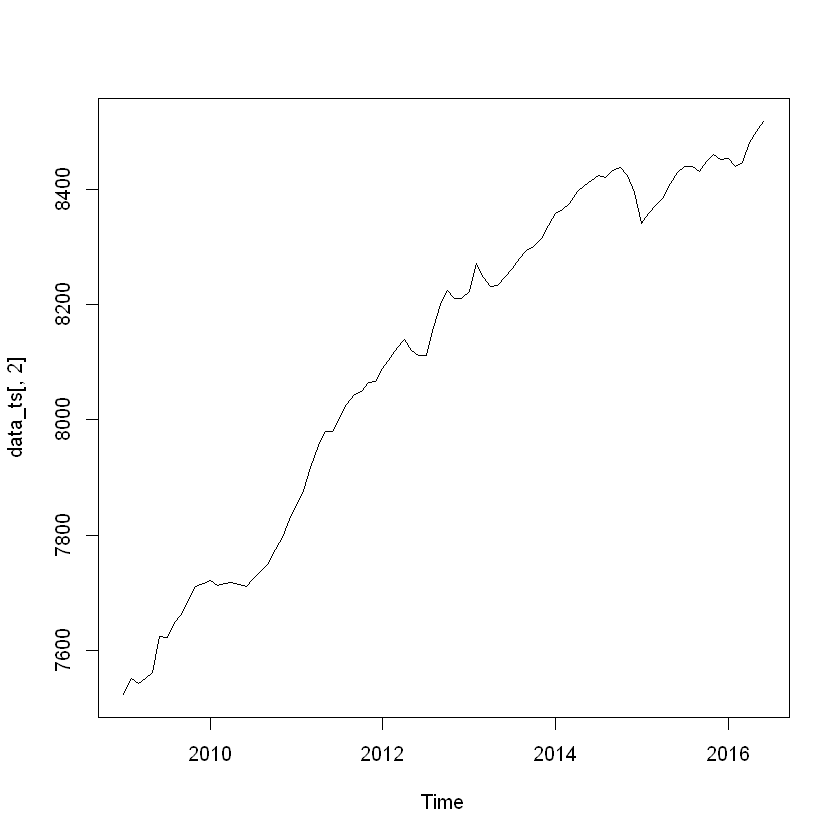

In [23]:
plot(data_ts[,2])
abline(reg=lm(data_ts~time(data_ts)))

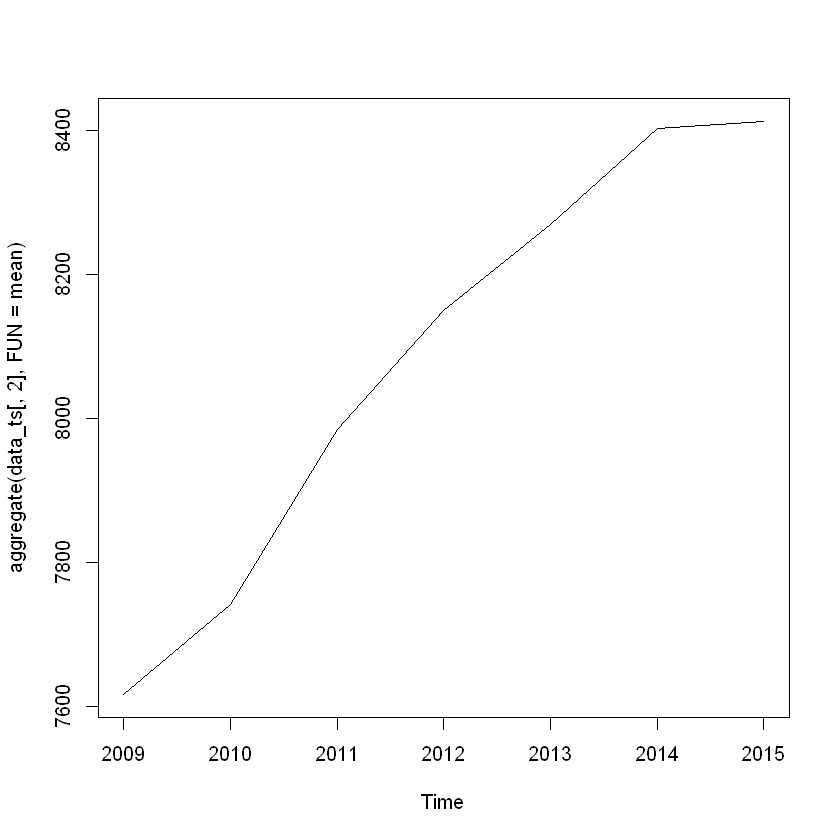

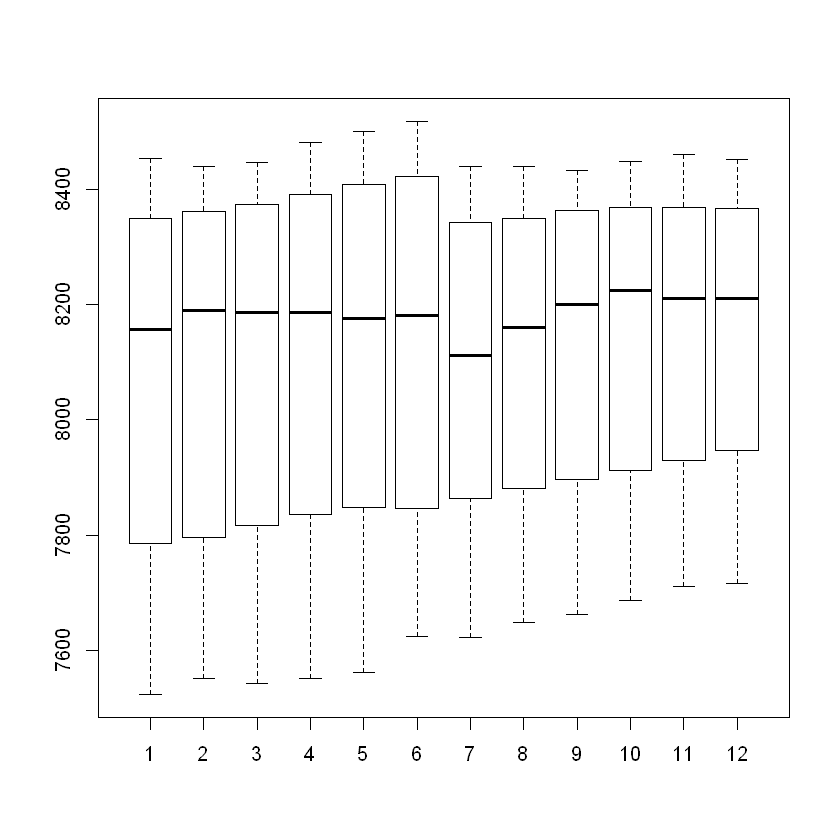

In [24]:
plot(aggregate(data_ts[,2],FUN=mean))
boxplot(data_ts[,2]~cycle(data_ts[,2]))

In [27]:
adf.test(diff(log(data_ts[,2])), alternative="stationary", k=0)

Warning message in adf.test(diff(log(data_ts[, 2])), alternative = "stationary", :
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff(log(data_ts[, 2]))
Dickey-Fuller = -7.0226, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


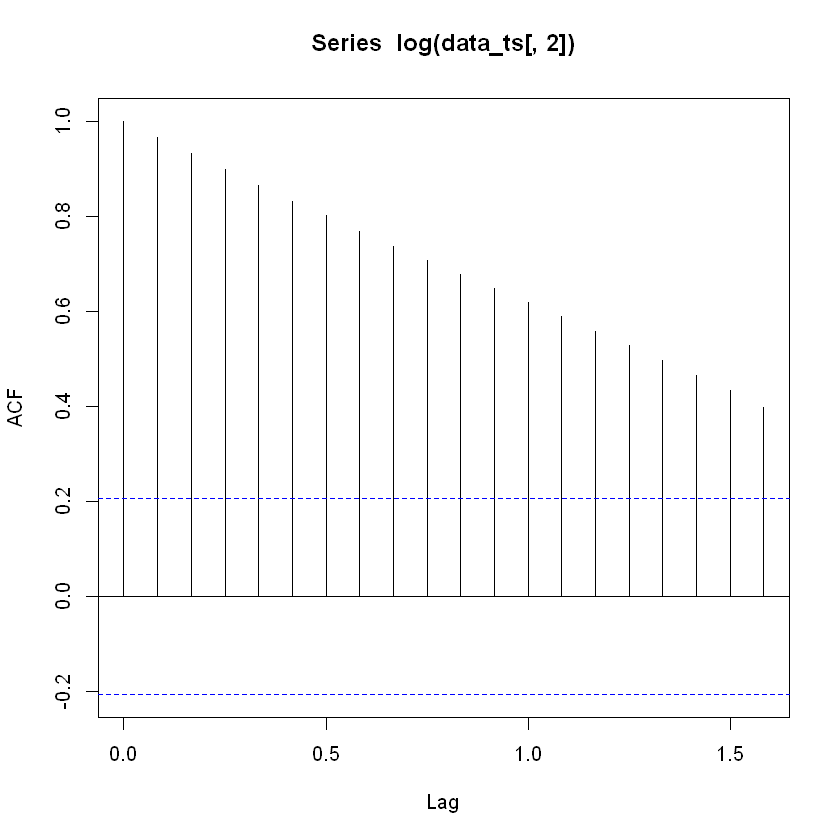

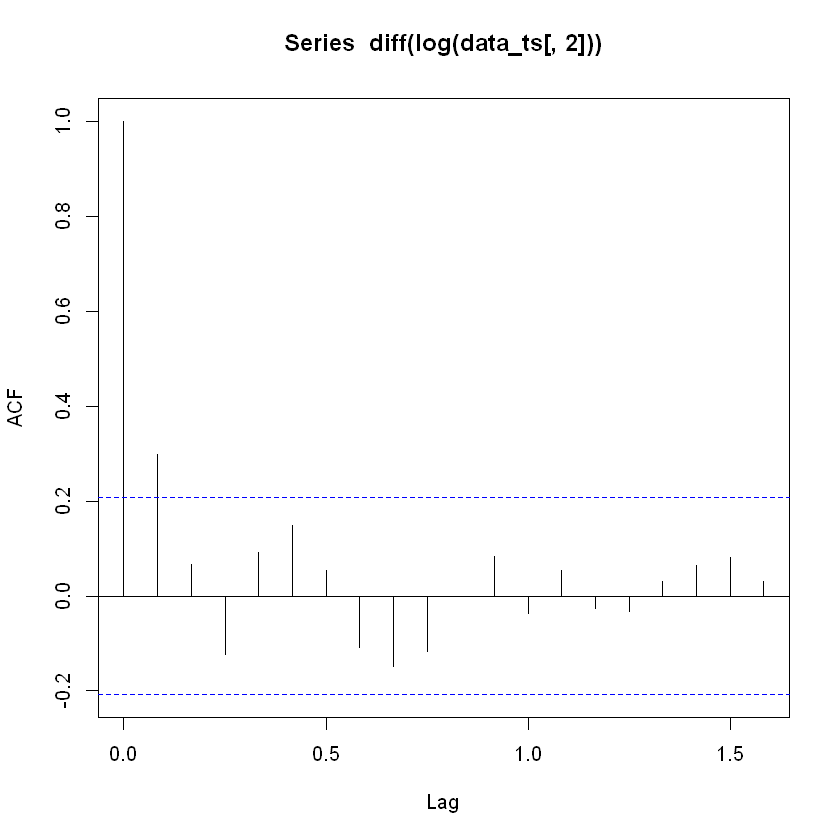

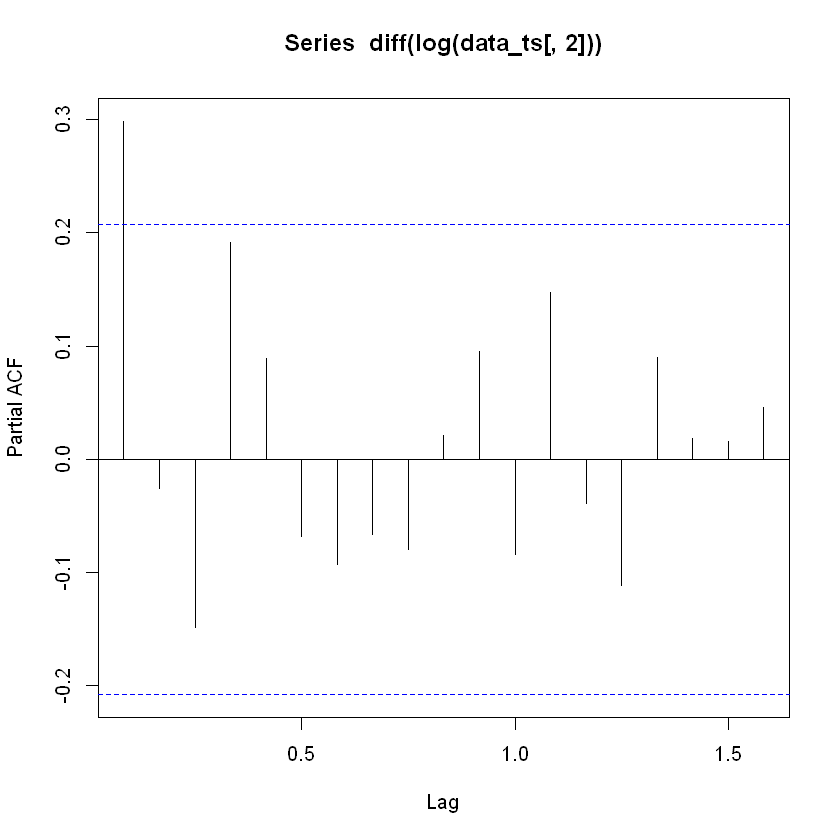

In [30]:
acf(log(data_ts[,2]))
acf(diff(log(data_ts[,2])))
pacf(diff(log(data_ts[,2])))

In [31]:
fit <- arima(log(data_ts[,2]), c(0, 1, 1),seasonal = list(order = c(0, 1, 1), period = 12))

In [32]:
pred <- predict(fit, n.ahead = 2*12)

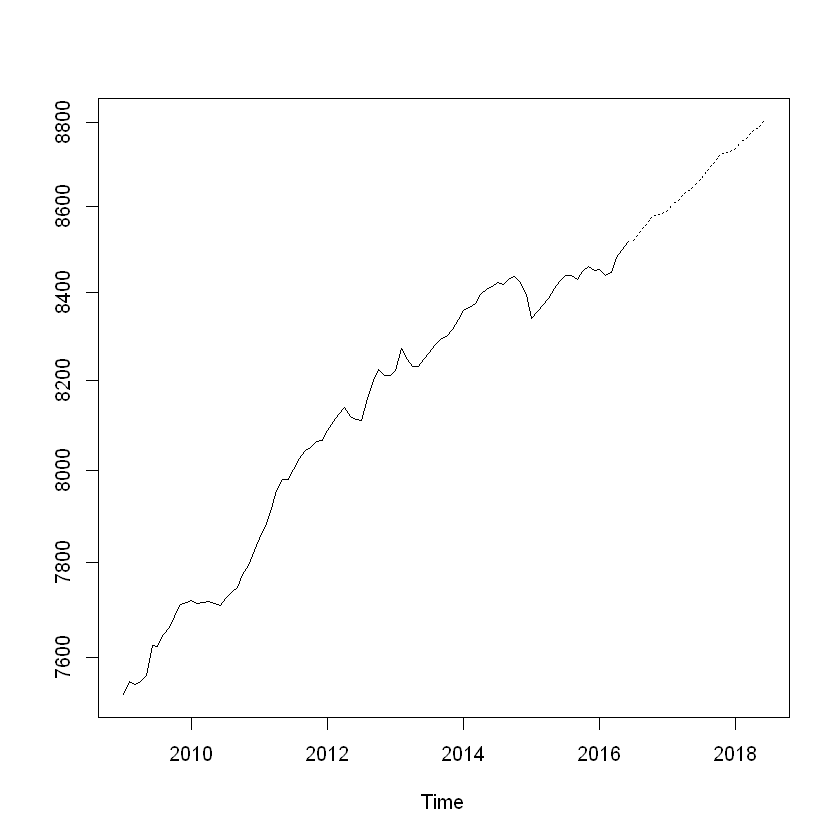

In [34]:
ts.plot(data_ts[,2],2.718^pred$pred, log = "y", lty = c(1,3))

In [37]:
diff(data_ts)[47]

[1] 30

In [43]:
weeklysales <- read.xlsx("weekly-sales-differencing.xlsx",sheetName="Sales")[,-(3:4)]

In [45]:
summary(weeklysales)

      Week        Sales      
 1      : 2   Min.   : 90.0  
 10     : 2   1st Qu.:110.0  
 11     : 2   Median :123.0  
 12     : 2   Mean   :120.0  
 13     : 2   3rd Qu.:132.2  
 14     : 2   Max.   :144.0  
 (Other):88                  

In [46]:
wk_ts<-ts(weeklysales[,2],frequency=52)

In [48]:
wk_ts

Time Series:
Start = c(1, 1) 
End = c(2, 48) 
Frequency = 52 
  [1] 100  94  90  96  91  94  95  99  95  98 100  97  99  98  96  98  96  99
 [19]  97  98 101 100 102 110 104 110 113 112 113 120 121 118 123 124 123 129
 [37] 125 119 118 120 115 122 118 120 116 118 119 118 120 123 124 123 121 126
 [55] 128 124 122 123 119 120 125 126 129 132 131 130 133 134 133 135 138 137
 [73] 140 138 144 135 138 137 136 136 137 138 140 139 131 129 134 133 133 134
 [91] 132 126 130 131 130 133 132 129 135 136

In [62]:
diff(diff(wk_ts))[16-2]

[1] 4

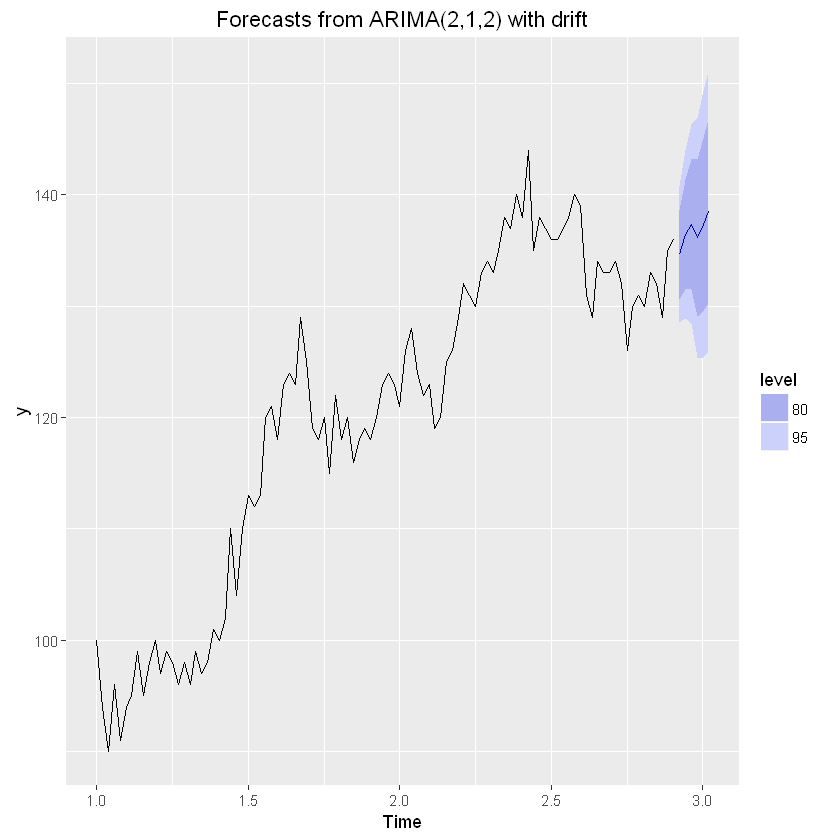

In [65]:
autoplot(forecast(auto.arima(wk_ts),h=6))